In [1]:
import yaml
from munch import Munch

with open("default.yaml", "r") as stream:
    data = yaml.load(stream, Loader=yaml.FullLoader)
args = Munch.fromDict(data)

In [4]:
from monai.data import ThreadDataLoader, load_decathlon_datalist, CacheDataset
from transform import get_transforms
import os 

datalist = load_decathlon_datalist(os.path.join(args.GENERAL.root_dir, args.GENERAL.task, "dataset.json"))
transform = get_transforms("validation", args)
dataset = CacheDataset(data=datalist, transform=transform, cache_rate=1.0,num_workers=16, progress=True)
dataloader = ThreadDataLoader(dataset,batch_size=1,num_workers=8,pin_memory=True,use_thread_workers=True,buffer_size=2)

Loading dataset: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 131/131 [06:15<00:00,  2.87s/it]


In [8]:
from monai.transforms import AsDiscrete
splitter = AsDiscrete(to_onehot=3, argmax=False)

In [18]:
from scipy.ndimage import label as scilabel
import numpy as np

connectivity = np.full((3,3,3), 1)

data = []

for batch in dataloader:
    _, num_tumours = scilabel(splitter(batch['label'][0])[2].cpu().numpy(), structure=connectivity)
    _, num_liver = scilabel(splitter(batch['label'][0])[1].cpu().numpy(), structure=connectivity)
    data.append([num_liver, num_tumours])

Text(0.5, 1.0, 'Number of numerically-connected region for Liver')

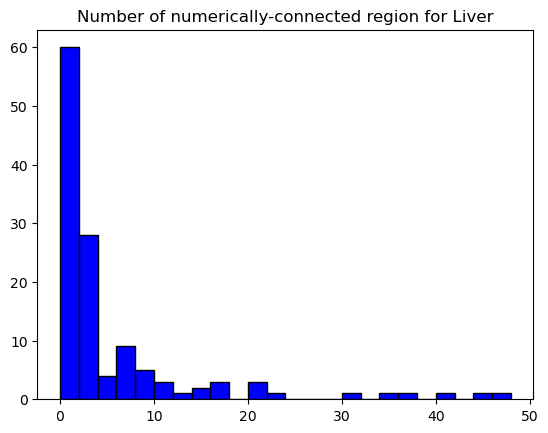

In [48]:
import matplotlib.pyplot as plt

counts, edges, bars = plt.hist([x[0] for x in data], color = 'blue', edgecolor = 'black', range=[0, 50], bins=range(0,50,2))
plt.title("Number of numerically-connected region for Liver")

Text(0.5, 1.0, 'Number of numerically-connected region for Tumours')

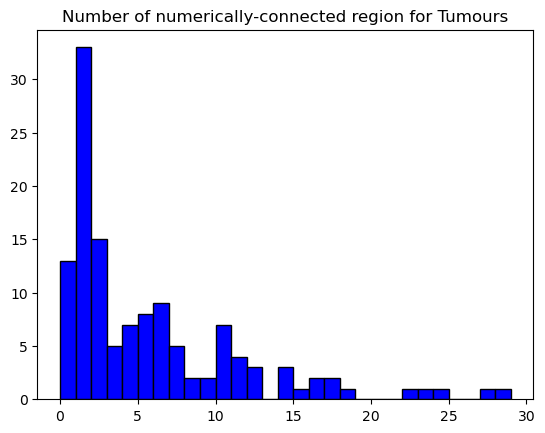

In [49]:
counts, edges, bars  = plt.hist([x[1] for x in data], color = 'blue', edgecolor = 'black', range=[0, 30], bins=range(30))
plt.title("Number of numerically-connected region for Tumours")